# Task by Dikshani Kumbhare

# Problem Statement
E-commerce goods Late delivery risk identification by predicting fastest and normal Shipping Durations. The Decision Tree model built by us, will enable E-commerce and Goods/products delivery industries to identify the 'risk of late delivery' and predict the fastest and normal duration of goods shipment for their Inland and foreign clients/ customers/buyers. Build a Multi-Output Decision Tree Regressor to determine the maximum range of shipping time, by predicting the Fastest and Normal duration for shipping of goods for both Inland and International customers. And Build a Binary Classifier to classify orders with high probabilty of late delivery (Late Delivery Risk analyser). The dataset of Supply Chains used by the company DataaCo Global which includes a collection of their products sold, finacial details(profit, loss, total sales etc.), Shipping details, and customer details such as sales, demographics, and transaction details. The data spans to 91 MB engulfing details of 180,520 customers spanning to 53 columns related to Clothing , Sports,and Electronic Supplies

​

In [ ]:
#import data

In [1]:
import pandas as pd

df = pd.read_csv (r'C:\Users\Manoj\Desktop\internship\task 4\DataCoSupplyChainDataset.csv')
#print(df)
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
import pandas as pd

df1 = pd.read_csv (r'C:\Users\Manoj\Desktop\internship\task 4\DescriptionDataCoSupplyChain.csv')
#print(df)
df1.head()

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer


In [5]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
#describe data

In [6]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [7]:
df.duplicated().sum()

0

In [ ]:
# correlation and covariance

In [8]:
df.corr()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
Days for shipping (real),1.000000,0.515880,-0.005101,0.001757,0.401415,-0.000348,0.003432,0.000112,-0.001631,-0.004073,...,-0.000811,0.001962,0.001757,-0.005101,-0.000811,-0.000859,-0.000348,NaN,0.002185,NaN
Days for shipment (scheduled),0.515880,1.000000,-0.000185,0.006445,-0.369352,-0.000367,0.000899,-0.003019,-0.000262,-0.005300,...,-0.002925,0.006327,0.006445,-0.000185,0.005249,-0.000431,-0.000367,NaN,0.006912,NaN
Benefit per order,-0.005101,-0.000185,1.000000,0.133484,-0.003727,0.031889,0.009354,0.002235,0.031442,0.000338,...,0.015696,0.131816,0.133484,1.000000,-0.004978,0.033161,0.031889,NaN,0.103459,NaN
Sales per customer,0.001757,0.006445,0.133484,1.000000,-0.003791,0.225201,0.060181,-0.001304,0.232367,-0.000223,...,0.105413,0.989744,1.000000,0.133484,-0.000138,0.236367,0.225201,NaN,0.781781,NaN
Late_delivery_risk,0.401415,-0.369352,-0.003727,-0.003791,1.000000,0.001752,0.001484,0.003148,0.001077,0.000679,...,-0.000139,-0.003564,-0.003791,-0.003727,-0.014131,0.001490,0.001752,NaN,-0.002175,NaN
Category Id,-0.000348,-0.000367,0.031889,0.225201,0.001752,1.000000,0.274633,0.002898,0.888835,0.002195,...,-0.302408,0.227483,0.225201,0.031889,-0.005943,0.991092,1.000000,NaN,0.461059,NaN
Customer Id,0.003432,0.000899,0.009354,0.060181,0.001484,0.274633,1.000000,0.002022,0.136897,0.002335,...,-0.091328,0.060961,0.060181,0.009354,-0.005659,0.228039,0.274633,NaN,0.111118,NaN
Customer Zipcode,0.000112,-0.003019,0.002235,-0.001304,0.003148,0.002898,0.002022,1.000000,0.002878,0.584553,...,-0.006174,-0.001490,-0.001304,0.002235,0.011843,0.003173,0.002898,NaN,0.002191,NaN
Department Id,-0.001631,-0.000262,0.031442,0.232367,0.001077,0.888835,0.136897,0.002878,1.000000,0.002460,...,-0.265437,0.234718,0.232367,0.031442,-0.005982,0.906117,0.888835,NaN,0.446743,NaN
Latitude,-0.004073,-0.005300,0.000338,-0.000223,0.000679,0.002195,0.002335,0.584553,0.002460,1.000000,...,-0.001853,-0.000696,-0.000223,0.000338,-0.002921,0.002031,0.002195,NaN,0.000471,NaN


In [9]:
df.cov()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
Days for shipping (real),2.636473,1.151301,-0.865031,0.342414,0.324370,-0.008830,2.319626e+01,6.856176e+00,-0.004314,-0.064907,...,-0.001914,0.421390,0.342414,-0.865031,-4.223260e+01,-4.691228e-01,-0.008830,NaN,0.495838,0.0
Days for shipment (scheduled),1.151301,1.889111,-0.026560,1.063378,-0.252642,-0.007892,5.142201e+00,-1.557707e+02,-0.000588,-0.071494,...,-0.005842,1.150190,1.063378,-0.026560,2.312935e+02,-1.992565e-01,-0.007892,NaN,1.327551,0.0
Benefit per order,-0.865031,-0.026560,10906.361300,1673.434635,-0.193702,52.085385,4.066685e+03,8.761165e+03,5.349710,0.346678,...,2.382514,1820.866786,1673.434635,10906.361300,-1.524040e+04,1.165165e+03,52.085385,NaN,1509.749341,0.0
Sales per customer,0.342414,1.063378,1673.434635,14410.482714,-0.226495,422.813181,3.007445e+04,-5.877932e+03,45.446512,-0.262279,...,18.392167,15715.693418,14410.482714,1673.434635,-4.439665e+02,9.546474e+03,422.813181,NaN,13113.602577,0.0
Late_delivery_risk,0.324370,-0.252642,-0.193702,-0.226495,0.247669,0.013633,3.075365e+00,5.881069e+01,0.000873,0.003316,...,-0.000101,-0.234633,-0.226495,-0.193702,-2.243846e+02,2.494219e-01,0.013633,NaN,-0.151266,0.0
Category Id,-0.008830,-0.007892,52.085385,422.813181,0.013633,244.611598,1.788087e+04,1.701511e+03,22.648860,0.336829,...,-6.874363,470.608037,422.813181,52.085385,-2.592485e+03,5.215176e+03,244.611598,NaN,1007.609275,0.0
Customer Id,23.196261,5.142201,4066.685355,30074.453361,3.075365,17880.866205,1.732989e+07,3.159490e+05,928.494584,95.398119,...,-552.587863,33567.503421,30074.453361,4066.685355,-6.494398e+05,3.193915e+05,17880.866205,NaN,64636.856839,0.0
Customer Zipcode,6.856176,-155.770682,8761.165052,-5877.931835,58.810695,1701.511292,3.159490e+05,1.409436e+09,176.017883,215366.776909,...,-336.893608,-7401.384539,-5877.931835,8761.165052,1.421674e+07,4.007794e+04,1701.511292,NaN,11493.718628,0.0
Department Id,-0.004314,-0.000588,5.349710,45.446512,0.000873,22.648860,9.284946e+02,1.760179e+02,2.654443,0.039335,...,-0.628562,50.582991,45.446512,5.349710,-2.816054e+02,4.966922e+02,22.648860,NaN,101.704908,0.0
Latitude,-0.064907,-0.071494,0.346678,-0.262279,0.003316,0.336829,9.539812e+01,2.153668e+05,0.039335,96.307654,...,-0.026434,-0.903495,-0.262279,0.346678,-9.131021e+02,6.704473e+00,0.336829,NaN,0.646282,0.0


In [ ]:
#histogram 

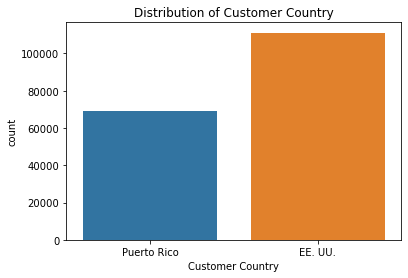

In [16]:
sns.countplot(x='Customer Country', data=df);
plt.title('Distribution of Customer Country');

above graph, coustomer is maximum in EE.UU.country

Text(0.5, 1.0, 'Top 10 Customer city')

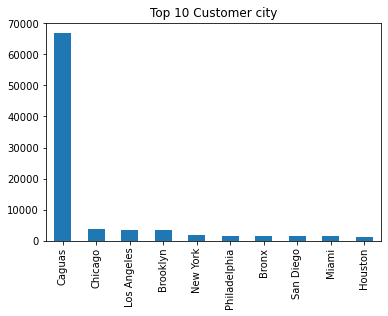

In [18]:
# Top ten Customer City
df['Customer City'].value_counts()[:10].plot(kind='bar')
plt.title("Top 10 Customer city")

top customer city is caguas 

Text(0.5, 1.0, 'Distribution of Payment types')

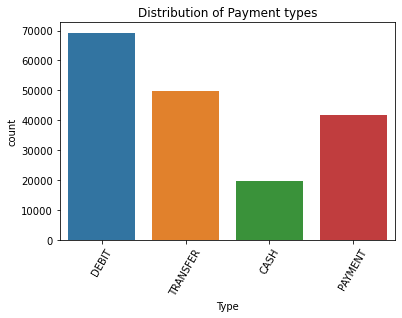

In [19]:
# Payment type
plot = sns.countplot(x='Type', data=df);
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
#data['Type'].value_counts().plot(kind='bar')
plt.title("Distribution of Payment types")

above graph, most of customer payment type is Debit then transfer and less payment type is cash 

Text(0.5, 1.0, 'Top 10 Category of goods')

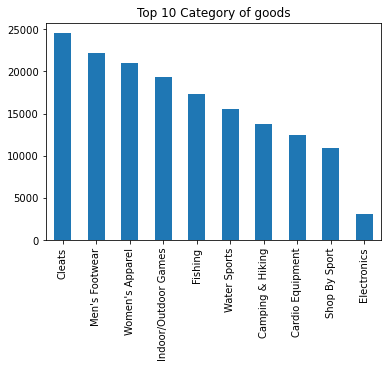

In [20]:
# Top 10 Category of goods
df['Category Name'].value_counts()[:10].plot(kind='bar')
plt.title("Top 10 Category of goods")

top category of goods are cleats then men's footware

Text(0.5, 1.0, 'Departments')

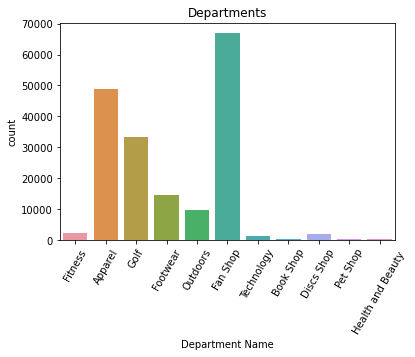

In [22]:
# Department Name
plt.figure(figsize=(6,4))
plot = sns.countplot(x='Department Name', data=df);
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
plt.title("Departments")

maximum department is fan shop 

Text(0.5, 1.0, 'Market list')

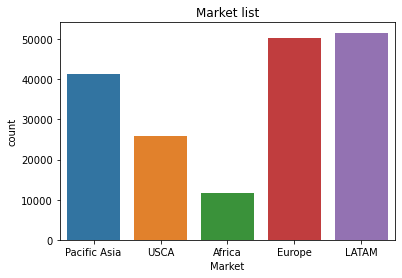

In [25]:
# Market
sns.countplot(x='Market', data=df);

#data['Market'].value_counts().plot(kind='bar')
plt.title("Market list")

market list europe and LATAM are the same in size

Text(0.5, 1.0, 'Order Regions')

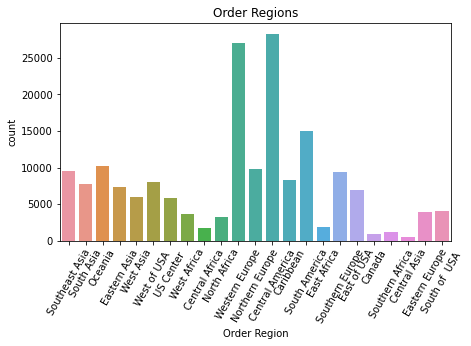

In [28]:
# Order Region
plt.figure(figsize=(7,4))
plot = sns.countplot(x='Order Region', data=df);
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
#data['Order Region'].value_counts().plot(kind='bar')
plt.title("Order Regions")

most of the oreder region is NORTH AFRICA and NORTHEN EUROPE

Text(0.5, 1.0, 'Top 10 Product Name')

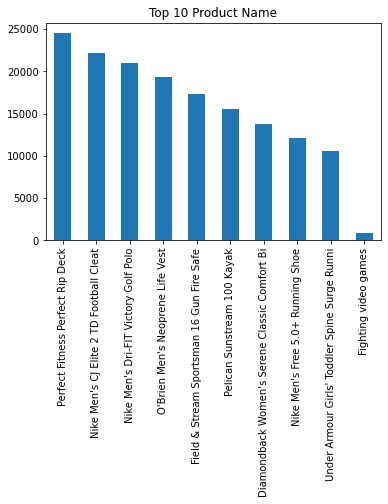

In [30]:
# Top 10 Product Name
df['Product Name'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Product Name')

top most product is perfect fitness perfect rip deck

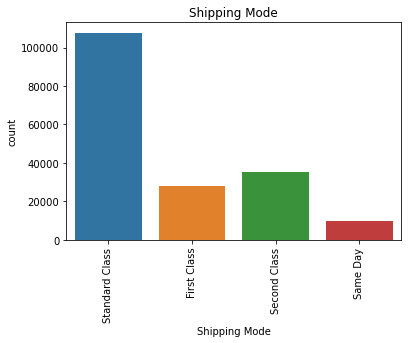

In [31]:
# Shipping Mode
sns.countplot(x='Shipping Mode', data=df)
plt.title('Shipping Mode')
plt.xticks(rotation = 90)
plt.show()

most of the shipping mode is standard class

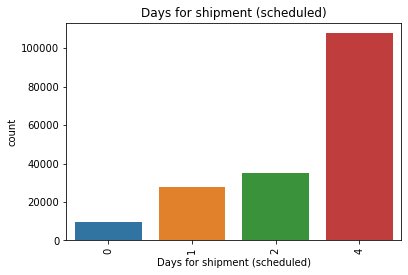

In [3]:
# Days for shipment (scheduled)
sns.countplot(x='Days for shipment (scheduled)', data=df)
plt.title('Days for shipment (scheduled)')
plt.xticks(rotation = 90)
plt.show()

most of the day of shipment(scheduled) 4 days 

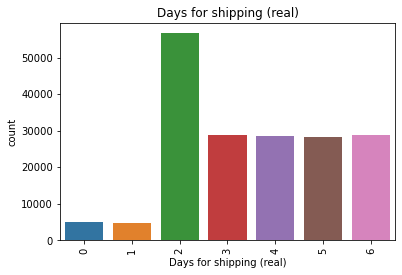

In [4]:
# Days for shipping (real)
sns.countplot(x='Days for shipping (real)', data=df)
plt.title('Days for shipping (real)')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Heatmap

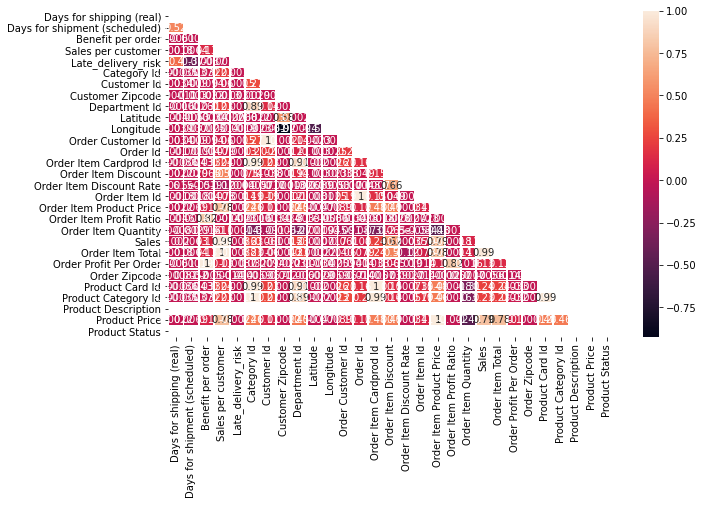

In [32]:

plt.figure(figsize=(10, 6))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket");

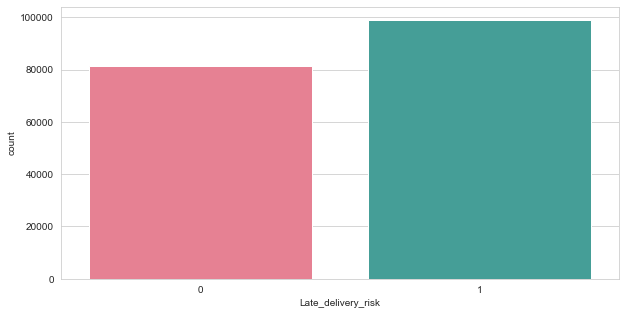

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(x="Late_delivery_risk", data=df, palette='husl');

Late delivery contain 1 and advance delivery/ shipping on date/shipping canceled are contain 0  
 

# Plot the Distribution plots for the features

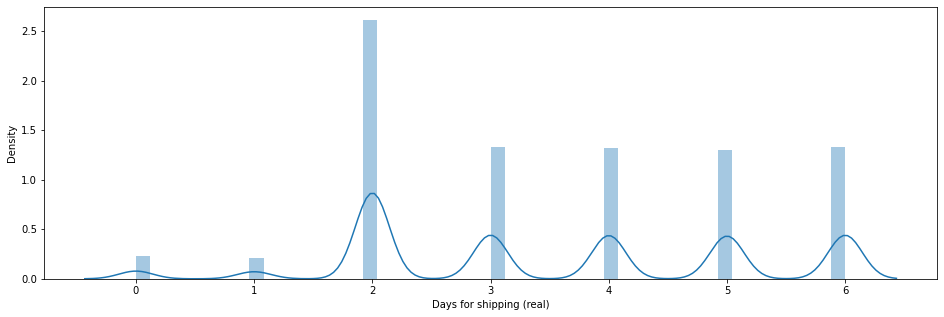

In [6]:

plt.figure(figsize=(16,5))
sns.distplot(df['Days for shipping (real)'])
plt.show()

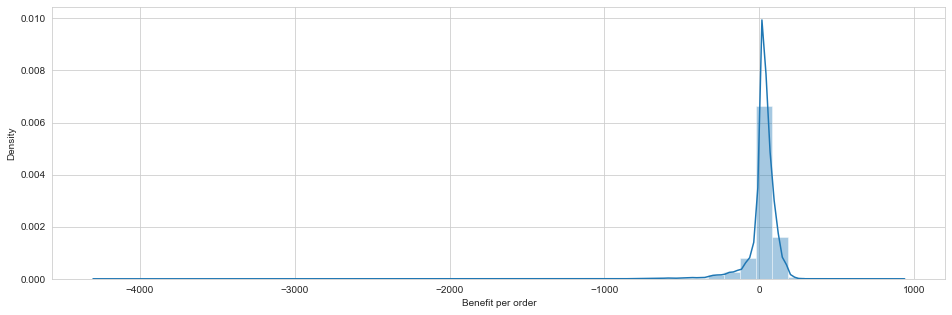

In [13]:
plt.figure(figsize=(16,5))
sns.distplot(df['Benefit per order'])
plt.show()

Benefit per order is show the negatively distribted.
A negatively skewed distribution is the straight reverse of a positively skewed distribution. In statistics, negatively skewed distribution refers to the distribution model where more values are plots on the right side of the graph, and the tail of the distribution is spreading on the left side.

In negatively skewed, the mean of the data is less than the median (a large number of data-pushed on the left-hand side). Negatively Skewed Distribution is a type of distribution where the mean, median, and mode of the distribution are negative rather than positive or zero.

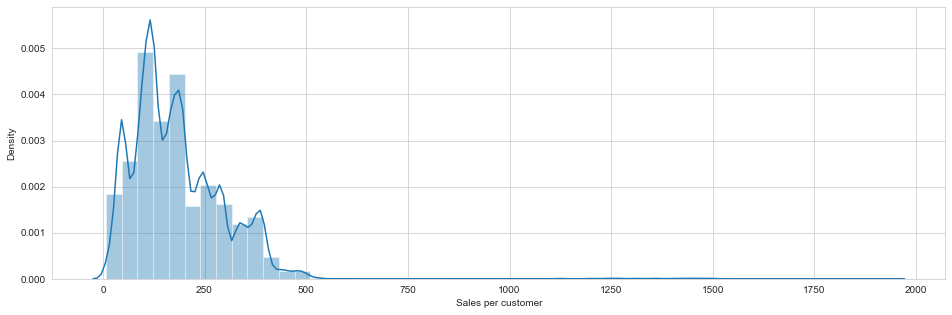

In [14]:
plt.figure(figsize=(16,5))
sns.distplot(df['Sales per customer'])
plt.show()

sales per customer normal distributed graph show it is postivily skwed.
a positively skewed distribution is a sort of distribution where, unlike symmetrically distributed data where all measures of the central tendency (mean, median, and mode) equal each other, with positively skewed data, the measures are dispersing, which means Positively Skewed Distribution is a type of distribution where the mean, median, and mode of the distribution are positive rather than negative or zero.


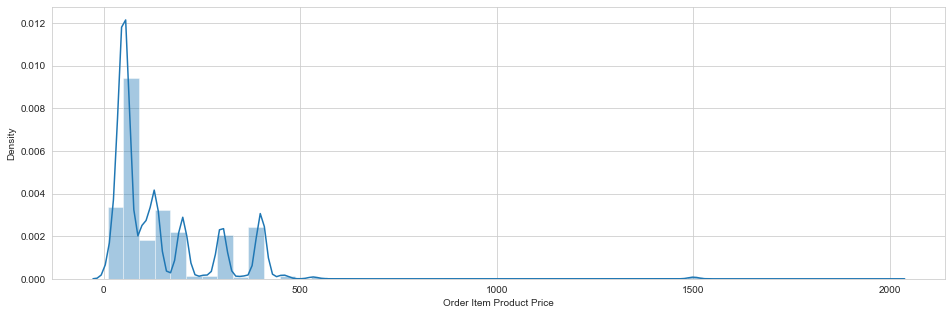

In [15]:
plt.figure(figsize=(16,5))
sns.distplot(df['Order Item Product Price'])
plt.show()

order item product price normal distributed graph show it is postivily skwed.
a positively skewed distribution is a sort of distribution where, unlike symmetrically distributed data where all measures of the central tendency (mean, median, and mode) equal each other, with positively skewed data, the measures are dispersing, which means Positively Skewed Distribution is a type of distribution where the mean, median, and mode of the distribution are positive rather than negative or zero.

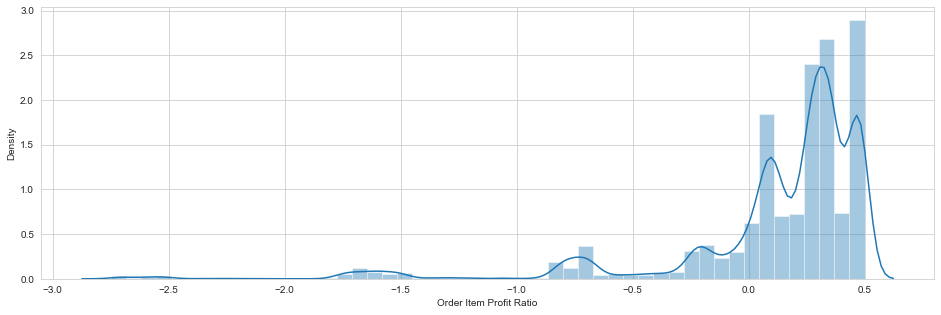

In [17]:
plt.figure(figsize=(16,5))
sns.distplot(df['Order Item Profit Ratio'])
plt.show()

A negatively skewed distribution is the straight reverse of a positively skewed distribution. In statistics, negatively skewed distribution refers to the distribution model where more values are plots on the right side of the graph, and the tail of the distribution is spreading on the left side.

In negatively skewed, the mean of the data is less than the median (a large number of data-pushed on the left-hand side). Negatively Skewed Distribution is a type of distribution where the mean, median, and mode of the distribution are negative rather than positive or zero.

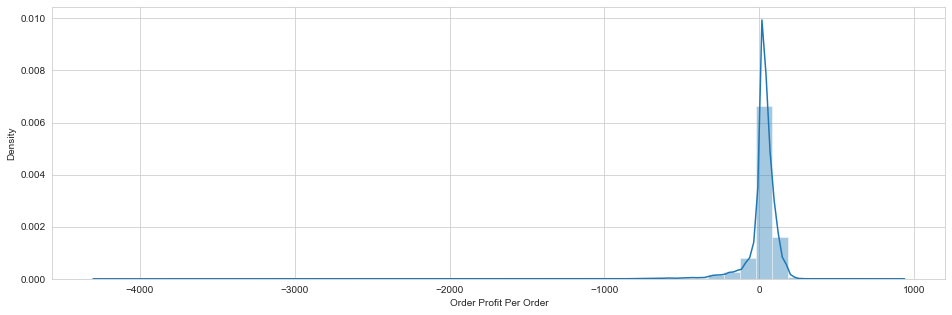

In [18]:
plt.figure(figsize=(16,5))
sns.distplot(df['Order Profit Per Order'])
plt.show()

A negatively skewed distribution is the straight reverse of a positively skewed distribution. In statistics, negatively skewed distribution refers to the distribution model where more values are plots on the right side of the graph, and the tail of the distribution is spreading on the left side.

In negatively skewed, the mean of the data is less than the median (a large number of data-pushed on the left-hand side). Negatively Skewed Distribution is a type of distribution where the mean, median, and mode of the distribution are negative rather than positive or zero.

# box plot

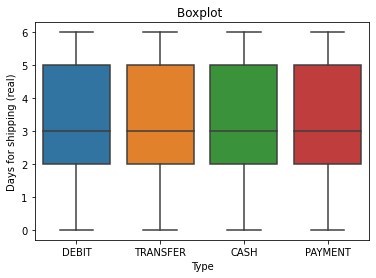

In [15]:

sbn.boxplot(x = "Type", y = "Days for shipping (real)", data = df)
plt.title("Boxplot ")
plt.show()


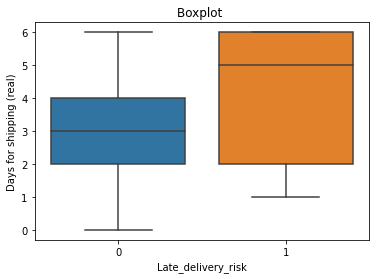

In [15]:

sbn.boxplot(x = "Late_delivery_risk", y = "Days for shipping (real)", data = df)
plt.title("Boxplot ")
plt.show()


# Modelling
Build a Multi-Output Decision Tree Regressor to determine the maximum range of shipping time, by predicting the Fastest and Normal duration for shipping of goods for both Inland and International customers.

In [6]:
data=df.copy()
df['SUSPECTED_FRAUD'] = np.where(df['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [8]:
features=df.drop(columns=['SUSPECTED_FRAUD','Order Status' ])
target=df['SUSPECTED_FRAUD']


In [9]:
features=features.apply(Labelencoder_feature)
features.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,3,3,18934,2568,0,0,47,40,66,...,609,114,47,0,78,78,62,0,27149,3
1,3,5,3,2272,2559,1,1,47,40,66,...,609,114,47,0,78,78,62,0,2209,3
2,0,4,3,2293,2555,3,0,47,40,452,...,609,114,47,0,78,78,62,0,1980,3
3,1,3,3,13638,2546,0,0,47,40,285,...,609,114,47,0,78,78,62,0,1752,3
4,2,2,3,20599,2526,0,0,47,40,66,...,609,114,47,0,78,78,62,0,1528,3


In [12]:
Features=features[['Type', 'Order Region', 
                   'Delivery Status', 'Late_delivery_risk','Customer Country', 'Customer State',
                   'Order State', 'Order City','Customer Segment',
                   'shipping date (DateOrders)','Shipping Mode']]
Features

,Type,Order Region,Delivery Status,Late_delivery_risk,Customer Country,Customer State,Order State,Order City,Customer Segment,shipping date (DateOrders),Shipping Mode
0,1,15,0,0,1,36,475,331,0,27149,3
1,3,13,1,1,1,36,841,391,0,2209,3
2,0,13,3,0,0,5,841,391,0,1980,3
3,1,11,0,0,0,5,835,3226,2,1752,3
4,2,11,0,0,1,36,835,3226,1,1528,3
...,...,...,...,...,...,...,...,...,...,...,...
180514,0,7,3,0,0,31,913,2922,2,2733,3
180515,1,7,1,1,0,5,770,1362,1,2339,2
180516,3,11,1,1,0,7,88,25,1,2727,3
180517,2,11,0,0,1,36,88,25,0,2114,3


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, target, test_size = 0.2, random_state = 42)

In [ ]:
#logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression() 
classifier.fit(X_train, y_train) 

LogisticRegression()

In [15]:
y_pred = classifier.predict(X_test) 

In [16]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[35254     0]
 [  850     0]]


In [18]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.9764569022822955


In [ ]:
#decision tree regression 

In [19]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)  

In [20]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  


In [22]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[35196,    58],
       [   78,   772]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[35196    58]
 [   78   772]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35254
           1       0.93      0.91      0.92       850

    accuracy                           1.00     36104
   macro avg       0.96      0.95      0.96     36104
weighted avg       1.00      1.00      1.00     36104

Accuracy: 0.9962331043651673


# Random Forest

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [104]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9958453356968757


In [105]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[35203    51]
 [   99   751]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35254
           1       0.94      0.88      0.91       850

    accuracy                           1.00     36104
   macro avg       0.97      0.94      0.95     36104
weighted avg       1.00      1.00      1.00     36104

Accuracy: 0.9958453356968757


# Build a Binary Classifier to classify orders with high probabilty of late delivery (Late Delivery Risk analyser). 

In [106]:
features=df.drop(columns=['Late_delivery_risk'])
target=df['Late_delivery_risk']

In [107]:
features=features.apply(Labelencoder_feature)
features.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Category Id,Category Name,Customer City,Customer Country,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,SUSPECTED_FRAUD
0,1,0,3,18934,2568,0,47,40,66,1,...,114,47,0,78,78,62,0,27149,3,0
1,3,1,3,2272,2559,1,47,40,66,1,...,114,47,0,78,78,62,0,2209,3,0
2,0,1,3,2293,2555,3,47,40,452,0,...,114,47,0,78,78,62,0,1980,3,0
3,1,0,3,13638,2546,0,47,40,285,0,...,114,47,0,78,78,62,0,1752,3,0
4,2,0,3,20599,2526,0,47,40,66,1,...,114,47,0,78,78,62,0,1528,3,0


In [26]:
features=features.apply(Labelencoder_feature)
features.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,3,3,18934,2568,0,0,47,40,66,...,609,114,47,0,78,78,62,0,27149,3
1,3,5,3,2272,2559,1,1,47,40,66,...,609,114,47,0,78,78,62,0,2209,3
2,0,4,3,2293,2555,3,0,47,40,452,...,609,114,47,0,78,78,62,0,1980,3
3,1,3,3,13638,2546,0,0,47,40,285,...,609,114,47,0,78,78,62,0,1752,3
4,2,2,3,20599,2526,0,0,47,40,66,...,609,114,47,0,78,78,62,0,1528,3


In [108]:
df['Delivery Status'].value_counts()


Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [ ]:
#logistic regression

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, target, test_size = 0.2, random_state = 42)

In [111]:

classifier = LogisticRegression() 
classifier.fit(X_train, y_train) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.42945380013294926


In [ ]:
#knn

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[35196    58]
 [   78   772]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35254
           1       0.93      0.91      0.92       850

    accuracy                           1.00     36104
   macro avg       0.96      0.95      0.96     36104
weighted avg       1.00      1.00      1.00     36104

Accuracy: 0.9962331043651673


In [ ]:
#decision Tree 

In [116]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [117]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.42945380013294926


In [118]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[15505   802]
 [19797     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.95      0.60     16307
           1       0.00      0.00      0.00     19797

    accuracy                           0.43     36104
   macro avg       0.22      0.48      0.30     36104
weighted avg       0.20      0.43      0.27     36104

Accuracy: 0.42945380013294926


In [ ]:
#random forest

In [121]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [122]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[16307     0]
 [    0 19797]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16307
           1       1.00      1.00      1.00     19797

    accuracy                           1.00     36104
   macro avg       1.00      1.00      1.00     36104
weighted avg       1.00      1.00      1.00     36104

Accuracy: 1.0


#conclusion 
1. According to modeling to predict the the maximun range of shipping time by precdicting the fastest and normal duration for shipping of goods for both inland and internation accurcy are
a. logistic regression = 97%
b. Decision tree = 99%
c. Random forest = 99%
so that random forest and decision tree both are model are best to predicting the maximum range of shipping time . and incresing the shipping time for delivey the order.

2. A binary classifer to classify order with high perobability of late delivery modelling are use for accuracy of the predicting the late delivery risk 
a. logistic regression= 42%
b. decision tree = 42%
c. knn =99%,k=3
d. random forest= 100%
 so the above modelling to predict the late delivery risk best model is random forest and KNN when k=3
